In [127]:
import requests

In [128]:
from IPython.display import display, HTML

In [129]:
from matplotlib import pyplot as plt

In [130]:
from matplotlib import pyplot as plt  
import cv2

def plot_images(imgs, names=None):        
    fig, axs = plt.subplots(ncols=len(imgs), figsize=(16, 8))
    for i, ax in enumerate(axs):
        ax.imshow(imgs[i])
#         ax.set_axis_off()
        if names and i < len(names):
            ax.set_title(names[i], fontsize=15)
    plt.show()
    
def plot_image(img, img_size=5):
    img = np.array(img)

    height, width = img.shape[:2]
    fig = plt.figure()
    fig.set_size_inches(width / height * img_size, img_size, forward=True)
    ax = plt.Axes(fig, [0., 0., 1, 1])
#     ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(img, cmap=plt.get_cmap('gray'))

    plt.show()
    
def augment_and_show(aug, image, figsize=10, **kwargs):
    res = aug(image=image, **kwargs)
    image = res['image']
    if 'mask' in res:
        plot_images([image, res['mask']])
    else:
        plot_image(image, figsize)

In [137]:
file_path = "Rosa_Red_Chateau01.jpg"

In [138]:
url = 'http://0.0.0.0:7766/rank'
files = {'file': open(file_path, 'rb')}

In [139]:
response = requests.post(url, files=files)

In [140]:
top_paths = response.json()["top_paths"]

In [141]:
top_images = [cv2.imread(path)[..., ::-1] for path in top_paths[:5]]

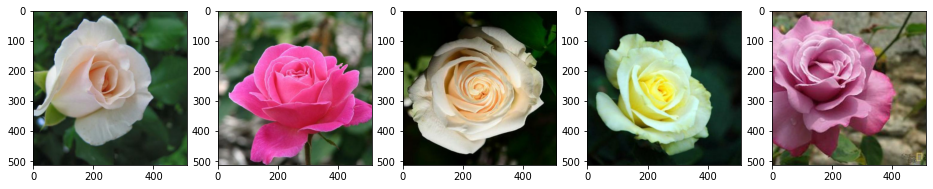

In [142]:
plot_images(top_images)